In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
res_dir = '/home/lmoroni/__workdir/augmenting_nlms_meco/output/probe_2_final'
metric = 'corr_acc' # ['r2', 'corr_acc', 'mse', 'mae']

In [3]:
def get_probing_dirs(res_dir):
    return [os.path.join(res_dir, dir_name) for dir_name in os.listdir(res_dir) if dir_name.startswith('probing')]

In [4]:
def load_probing_results(src_dir):
    res_path = os.path.join(src_dir, 'probe_results.json')
    df = pd.read_json(res_path)
    df = df.reset_index().rename(columns={'index': 'feature'})
    return df

In [5]:
def get_model_config(src_dir):
    model_config = dict()
    model_str = src_dir.split('/')[-1]
    model_config['language'] = 'it' if '_it_' in model_str else 'en'
    model_config['language_mode'] = 'cross_lingual' if 'xlm' in model_str else 'mono_lingual'
    model_config['pretraining'] = False if 'rand' in model_str else True
    model_str = model_str.split('_')
    model_config['user'] = model_str[2]
    return model_config

In [13]:
probing_dirs = get_probing_dirs(res_dir)

In [14]:
all_dfs = []
for src_dir in probing_dirs:
    res_df = load_probing_results(src_dir)
    model_config = get_model_config(src_dir)
    for key in model_config.keys():
        res_df[key] = model_config[key]
    all_dfs.append(res_df)
all_dfs = pd.concat(all_dfs, ignore_index=True)

In [15]:
all_dfs = all_dfs[all_dfs['feature'].str.contains('test')]

layers_columns = [str(value) for value in range(12)]
all_dfs[layers_columns] = all_dfs[layers_columns].map(lambda x: x[metric])
all_dfs['feature'] = all_dfs['feature'].map(lambda x: x[:-len('_score_test')])

In [16]:
all_dfs

,feature,linear,0,1,2,3,4,5,6,7,8,9,10,11,language,language_mode,pretraining,user
1,skip,True,49.429337,49.471173,49.562533,49.988736,50.808589,49.497639,50.335988,50.439099,47.797418,49.347347,49.274878,48.677872,it,cross_lingual,False,44
3,firstfix_dur,True,18.271424,18.085782,18.267211,18.031789,18.096036,18.371084,18.799977,18.261577,17.906606,18.355607,18.148233,18.085079,it,cross_lingual,False,44
5,firstrun_dur,True,14.161086,14.173982,14.034642,14.006875,14.012187,13.899412,14.175777,13.995016,13.658035,14.127485,14.224374,14.265352,it,cross_lingual,False,44
7,dur,True,12.048155,12.105913,12.348349,11.983273,12.251919,12.000688,12.217556,11.938850,11.869923,12.052658,12.041887,11.949797,it,cross_lingual,False,44
9,firstrun_nfix,True,14.625691,14.712341,14.419811,14.680760,14.769604,14.320015,14.218470,14.299169,13.894021,14.474727,14.203944,14.422073,it,cross_lingual,False,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,dur,True,11.052347,10.992589,10.712163,10.865683,11.103133,11.318633,11.563546,11.491131,11.168291,11.210146,11.484828,11.240779,en,mono_lingual,True,98
633,firstrun_nfix,True,14.615445,14.349320,14.006113,14.298352,14.279126,14.568473,15.002703,14.288811,14.402333,14.168614,14.088176,14.013203,en,mono_lingual,True,98
635,nfix,True,11.626733,11.138321,11.073409,11.285206,11.508168,11.669061,12.026559,11.932983,11.616174,11.348323,11.755589,11.572005,en,mono_lingual,True,98
637,refix,True,33.824266,34.755869,34.392224,35.196265,35.692853,36.469653,36.518727,36.254683,36.123886,36.553684,34.997041,35.120483,en,mono_lingual,True,98


In [17]:
grouped_dfs = all_dfs.groupby(['language', 'language_mode', 'pretraining'])

Language = en, language_mode = cross_lingual, pretraining = False


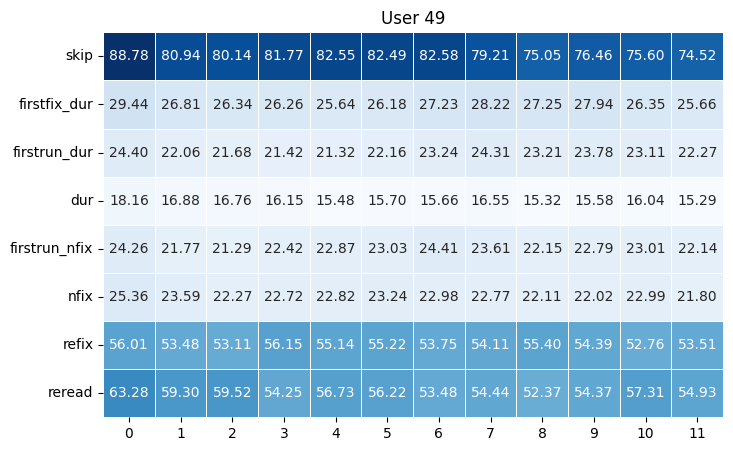

<Figure size 640x480 with 0 Axes>

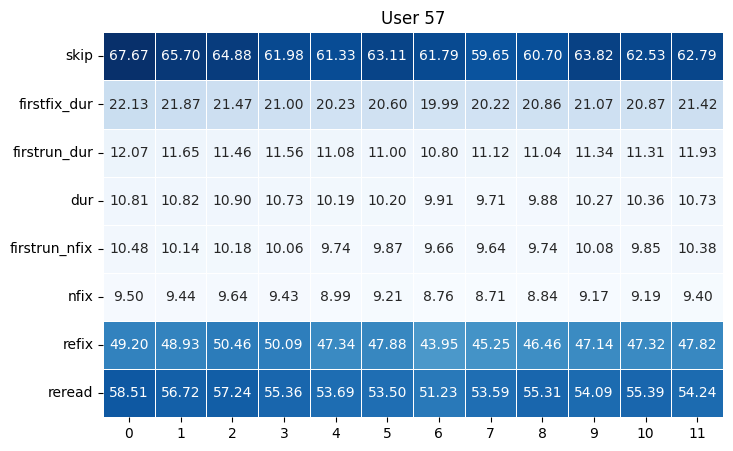

<Figure size 640x480 with 0 Axes>

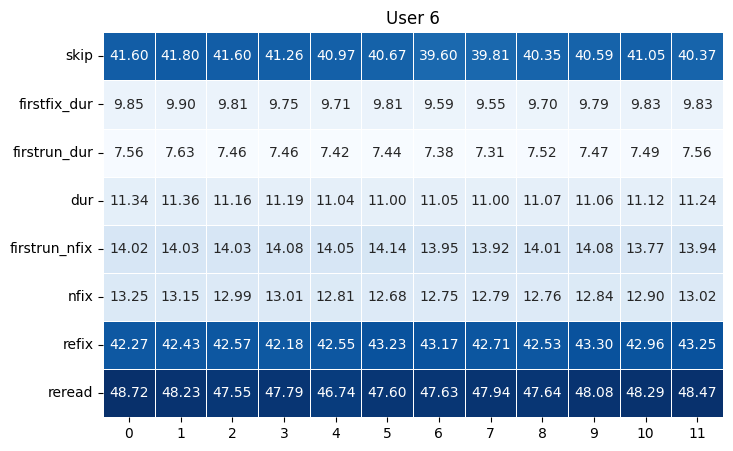

<Figure size 640x480 with 0 Axes>

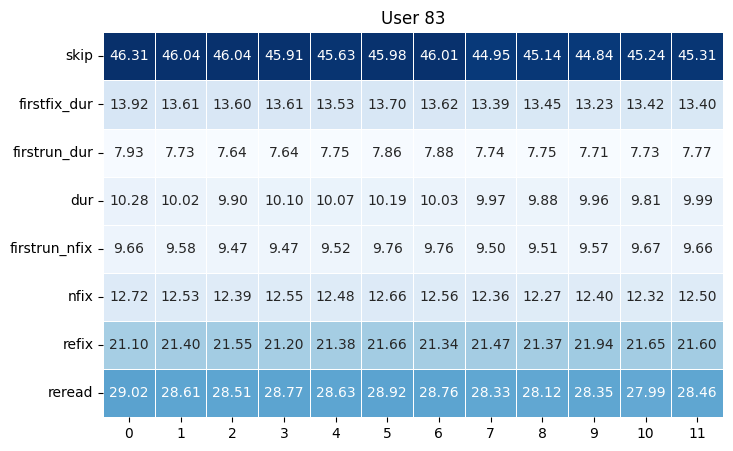

<Figure size 640x480 with 0 Axes>

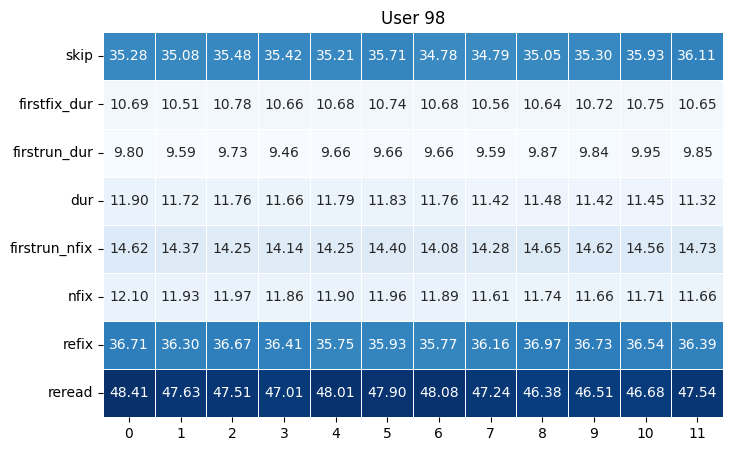

Language = en, language_mode = cross_lingual, pretraining = True


<Figure size 640x480 with 0 Axes>

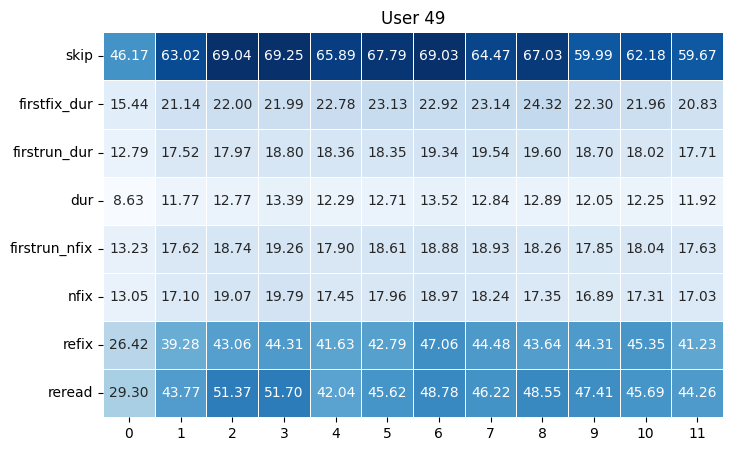

<Figure size 640x480 with 0 Axes>

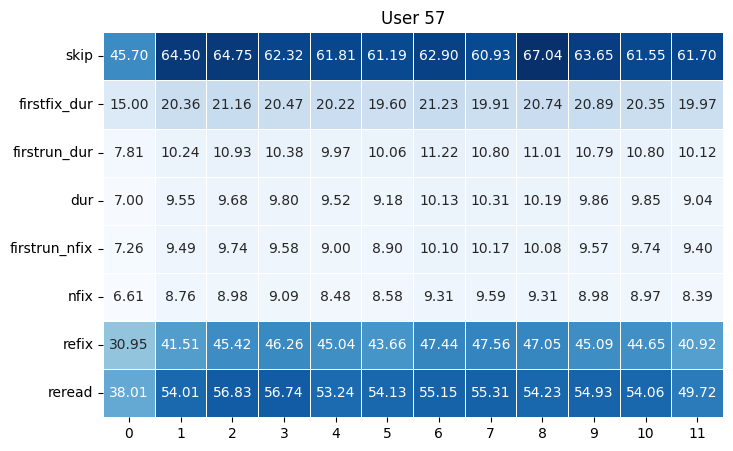

<Figure size 640x480 with 0 Axes>

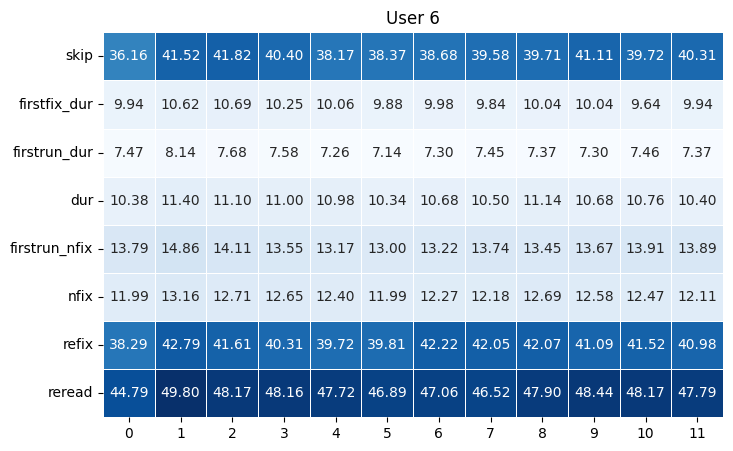

<Figure size 640x480 with 0 Axes>

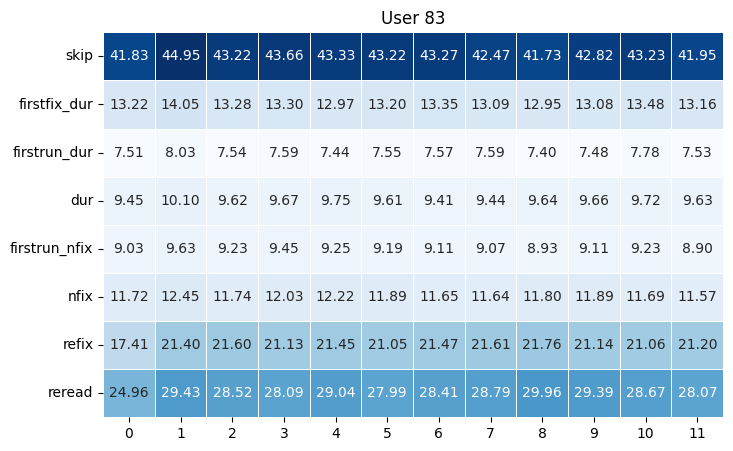

<Figure size 640x480 with 0 Axes>

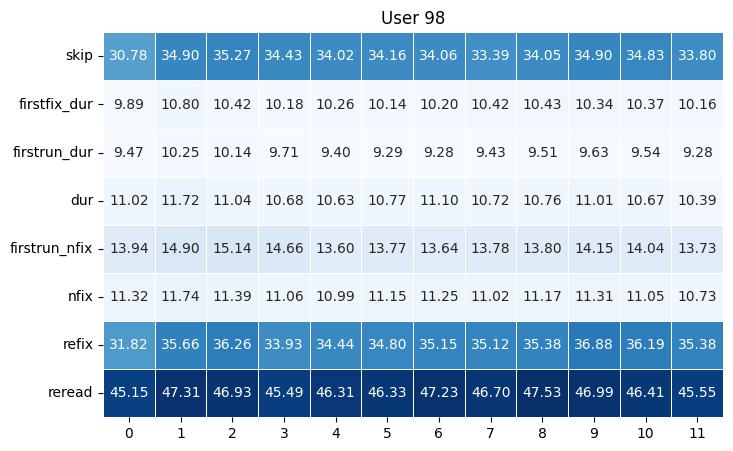

Language = en, language_mode = mono_lingual, pretraining = False


<Figure size 640x480 with 0 Axes>

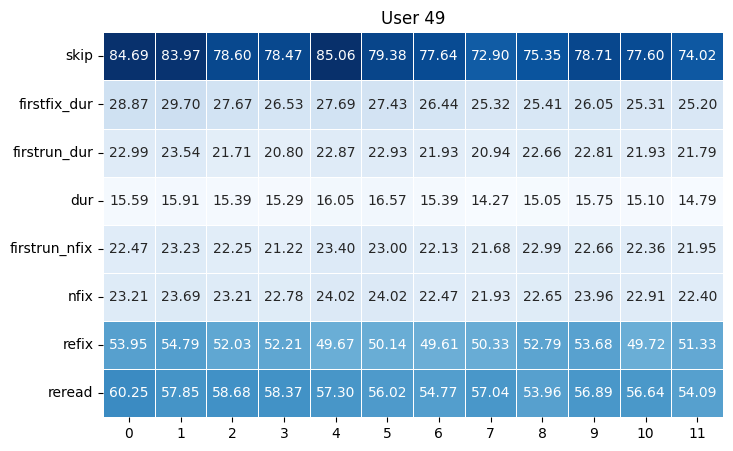

<Figure size 640x480 with 0 Axes>

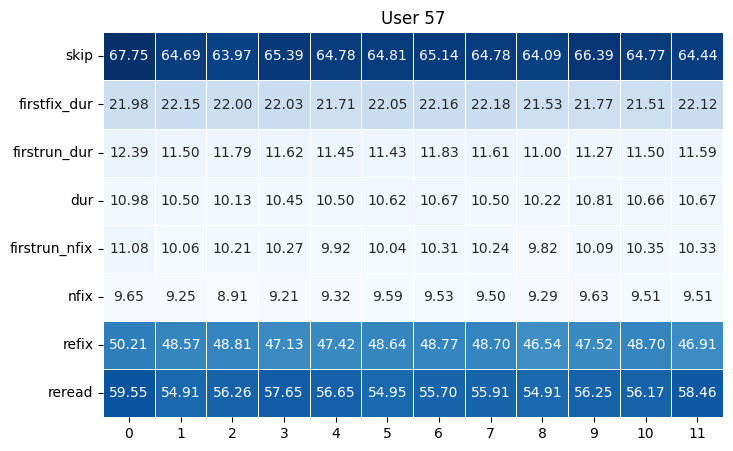

<Figure size 640x480 with 0 Axes>

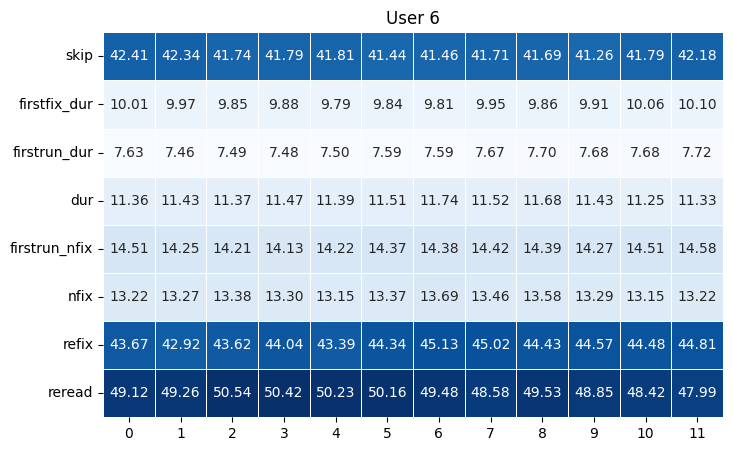

<Figure size 640x480 with 0 Axes>

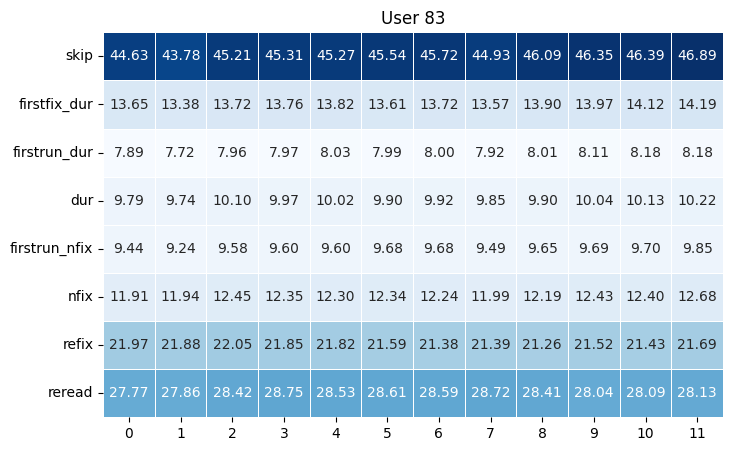

<Figure size 640x480 with 0 Axes>

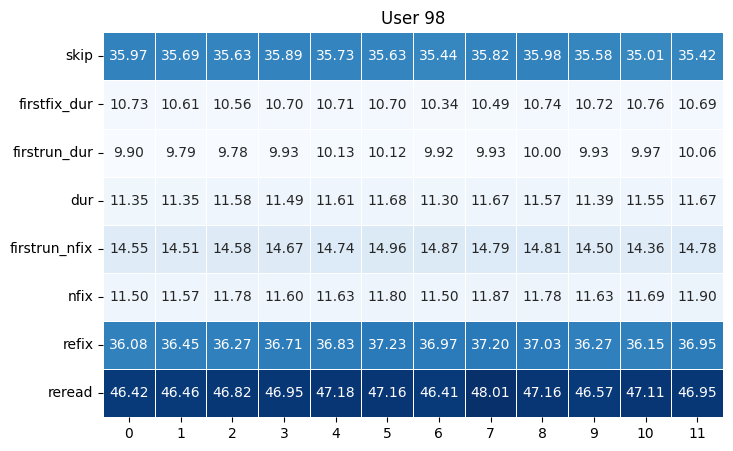

Language = en, language_mode = mono_lingual, pretraining = True


<Figure size 640x480 with 0 Axes>

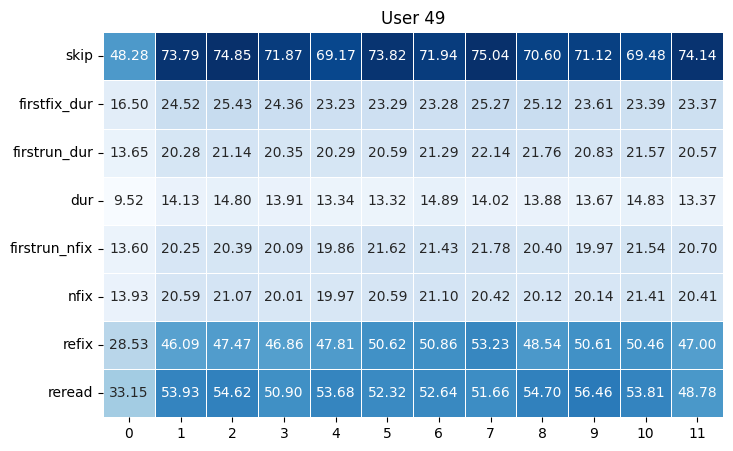

<Figure size 640x480 with 0 Axes>

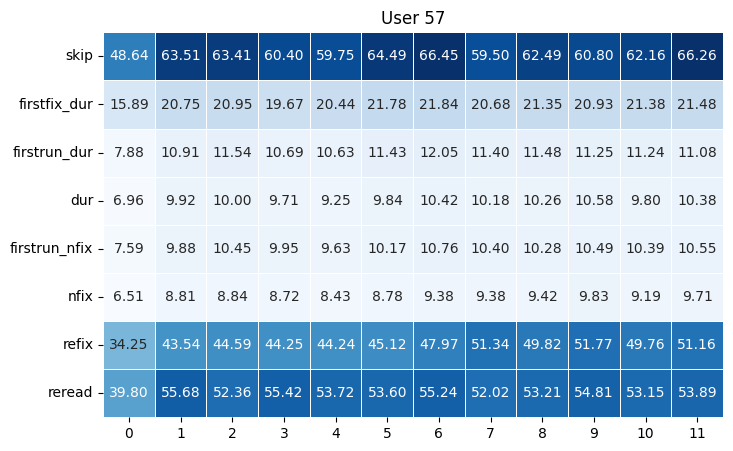

<Figure size 640x480 with 0 Axes>

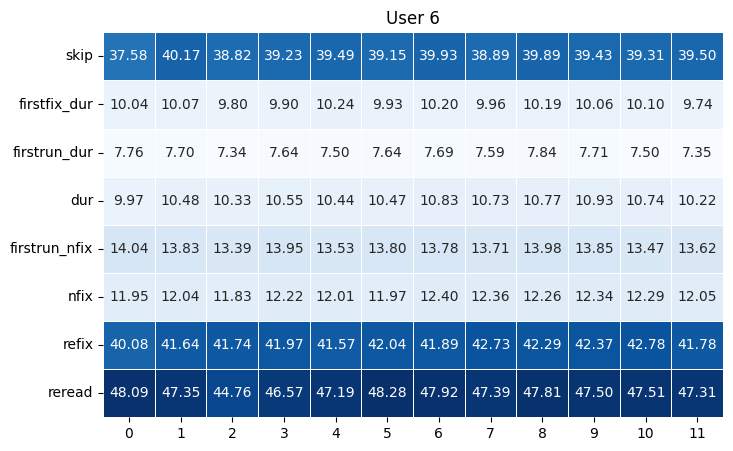

<Figure size 640x480 with 0 Axes>

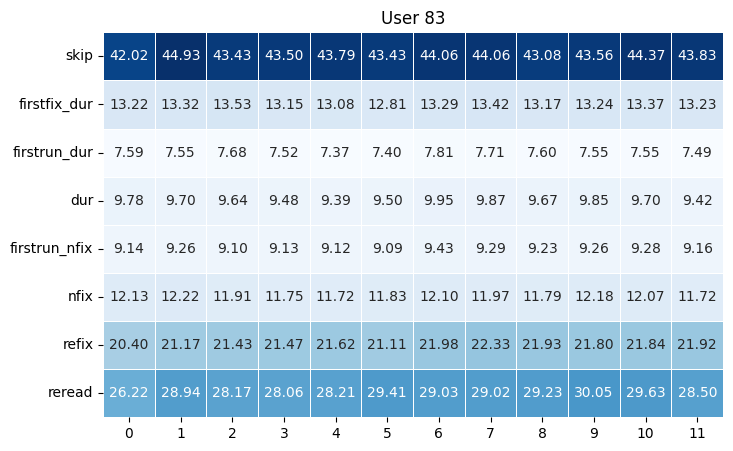

<Figure size 640x480 with 0 Axes>

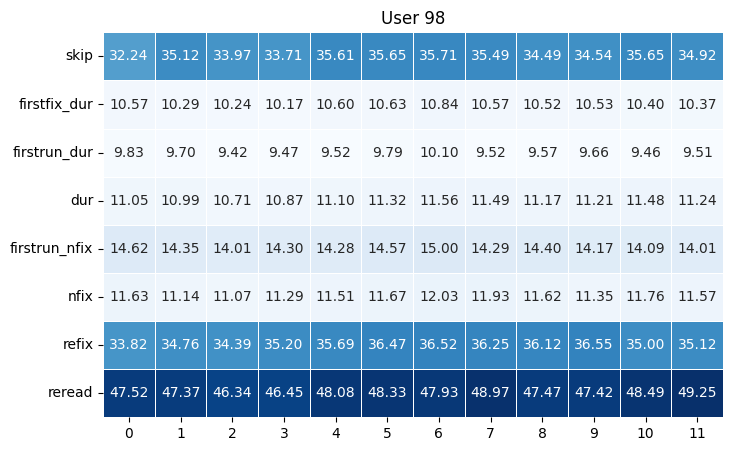

Language = it, language_mode = cross_lingual, pretraining = False


<Figure size 640x480 with 0 Axes>

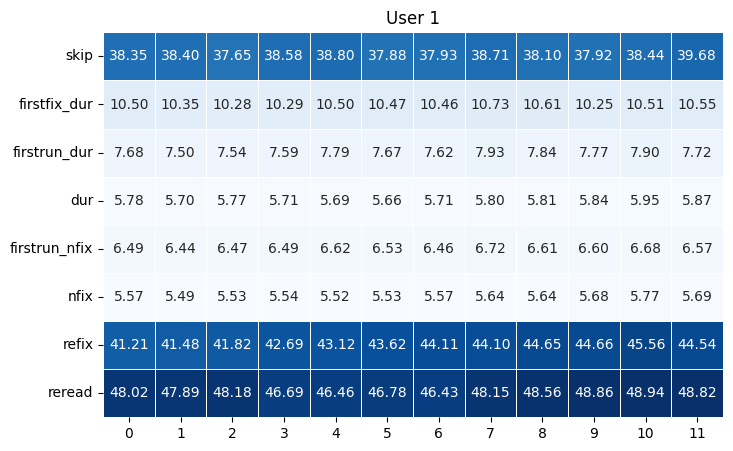

<Figure size 640x480 with 0 Axes>

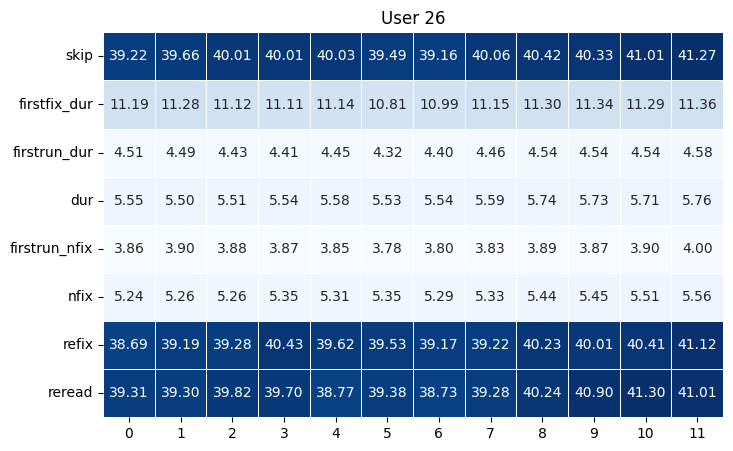

<Figure size 640x480 with 0 Axes>

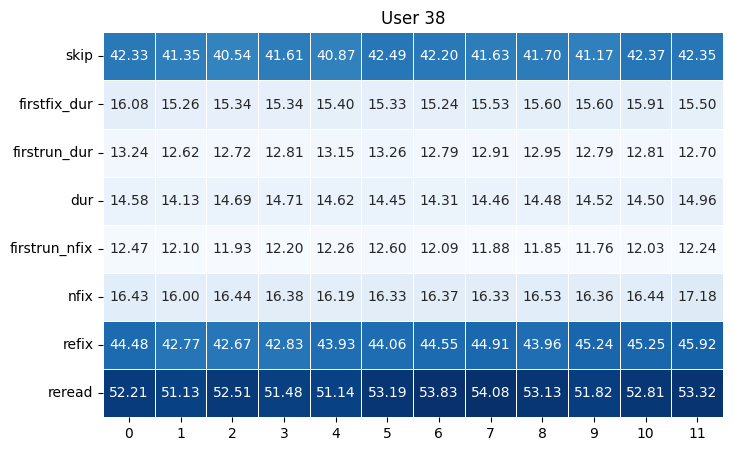

<Figure size 640x480 with 0 Axes>

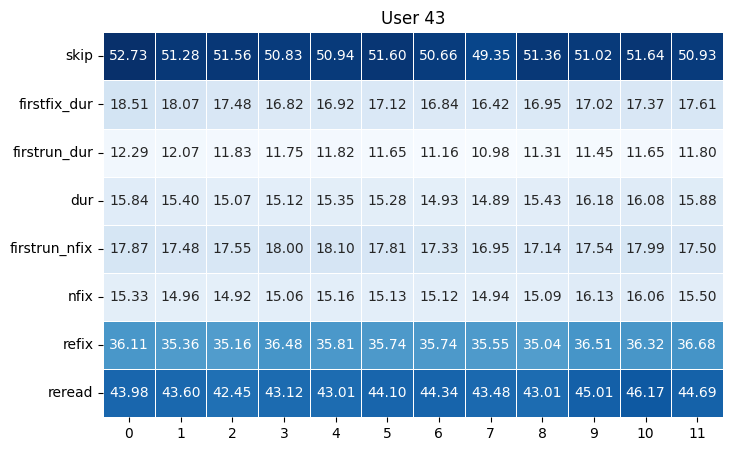

<Figure size 640x480 with 0 Axes>

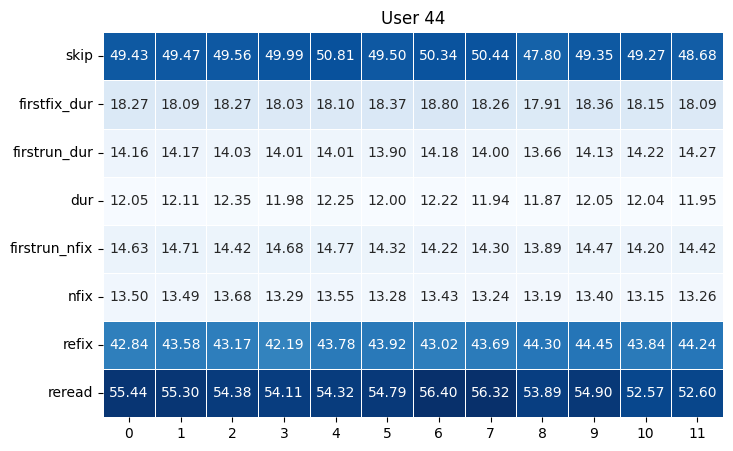

Language = it, language_mode = cross_lingual, pretraining = True


<Figure size 640x480 with 0 Axes>

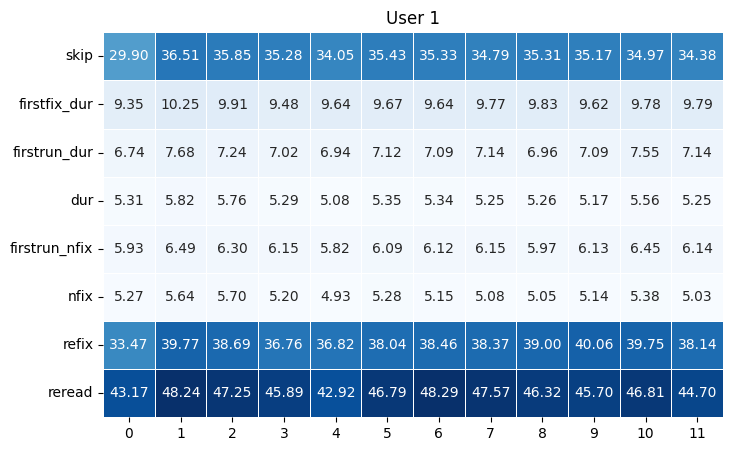

<Figure size 640x480 with 0 Axes>

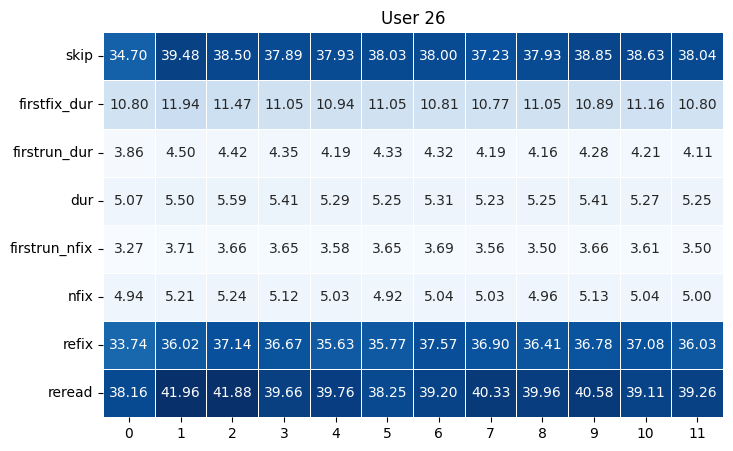

<Figure size 640x480 with 0 Axes>

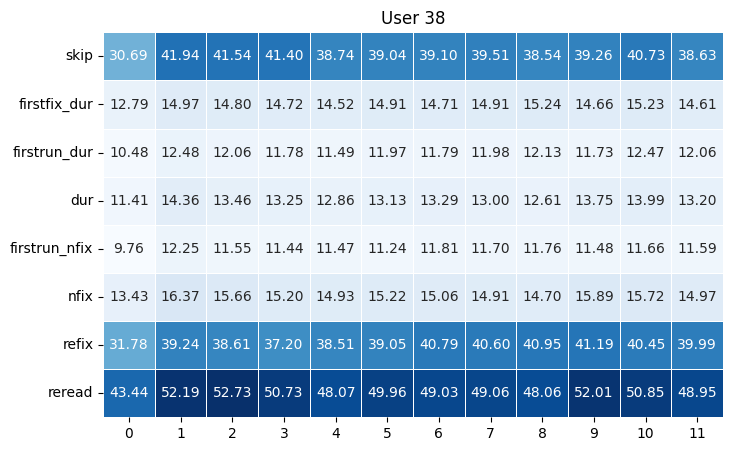

<Figure size 640x480 with 0 Axes>

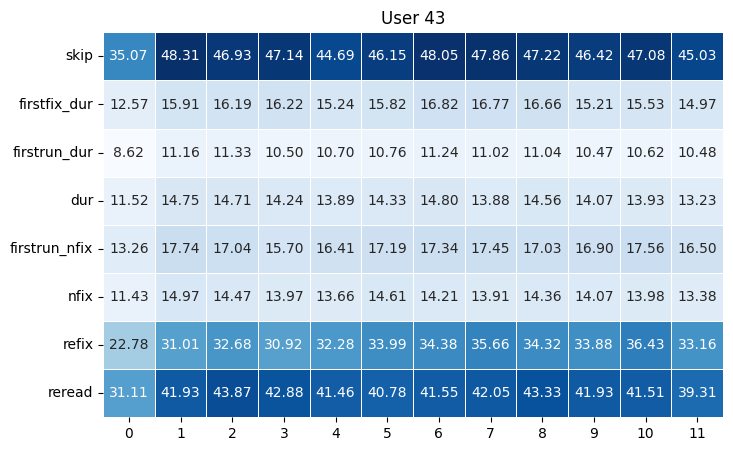

<Figure size 640x480 with 0 Axes>

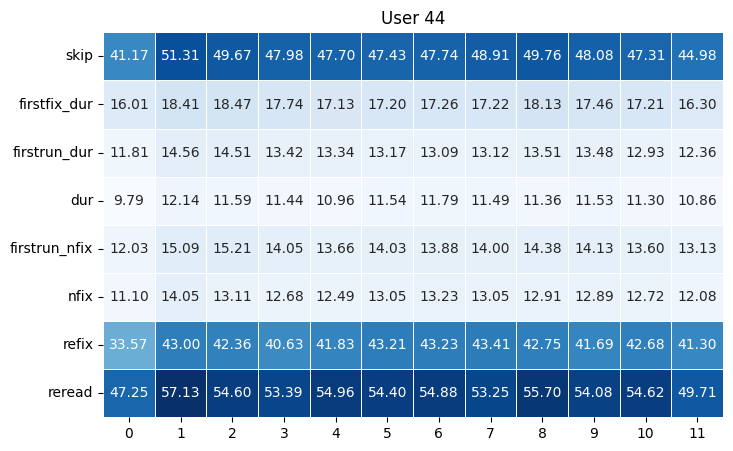

Language = it, language_mode = mono_lingual, pretraining = False


<Figure size 640x480 with 0 Axes>

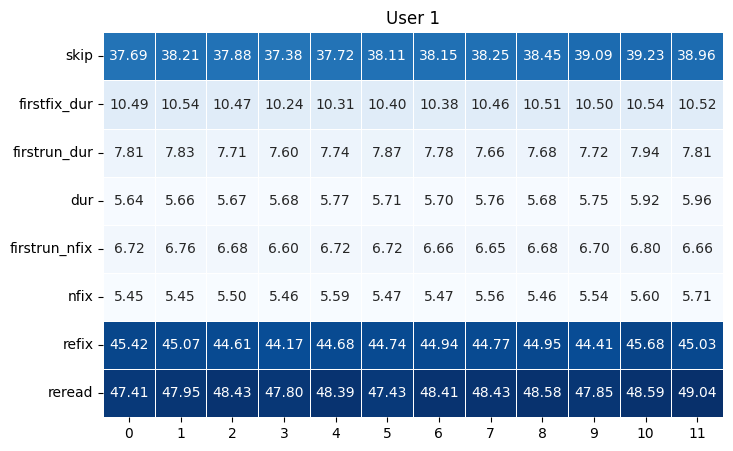

<Figure size 640x480 with 0 Axes>

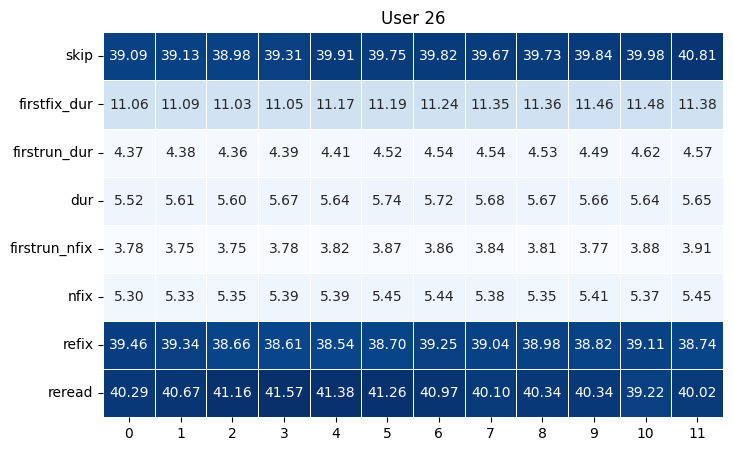

<Figure size 640x480 with 0 Axes>

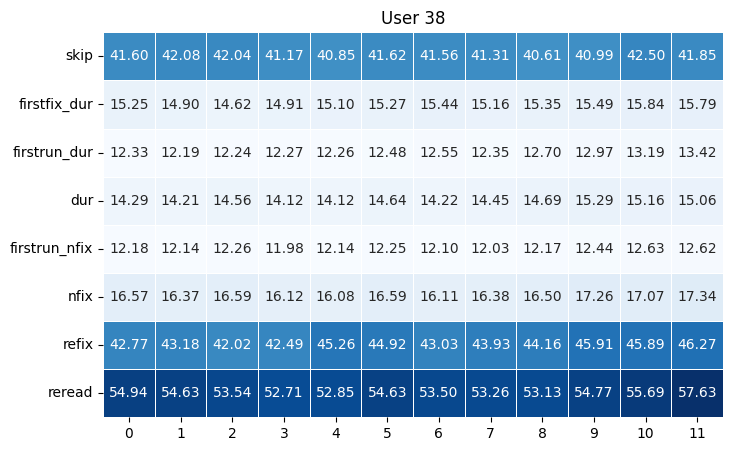

<Figure size 640x480 with 0 Axes>

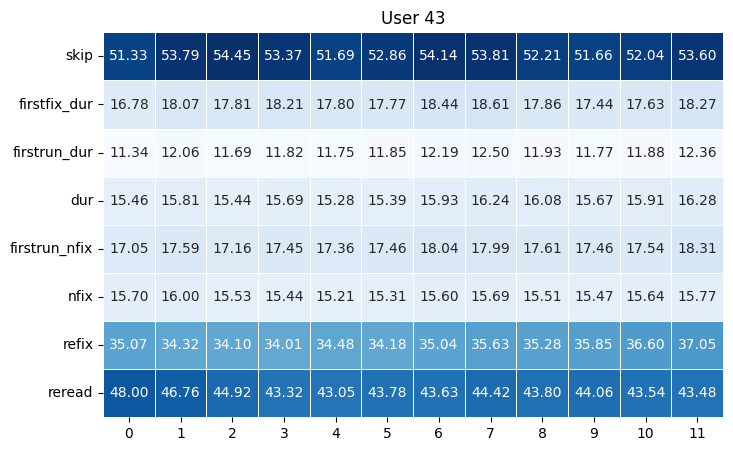

<Figure size 640x480 with 0 Axes>

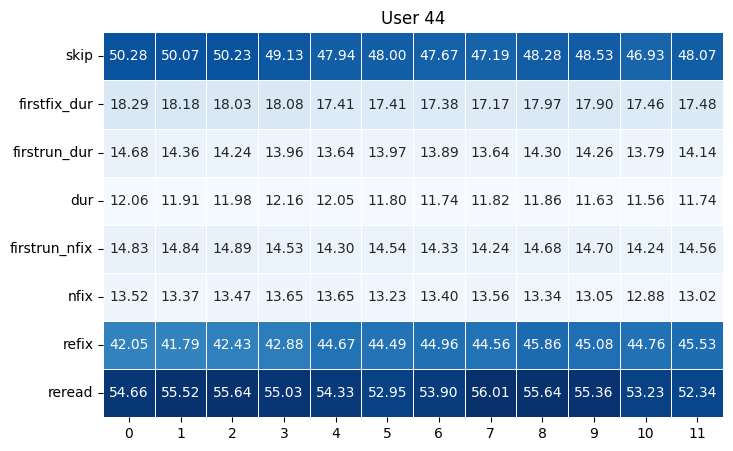

Language = it, language_mode = mono_lingual, pretraining = True


<Figure size 640x480 with 0 Axes>

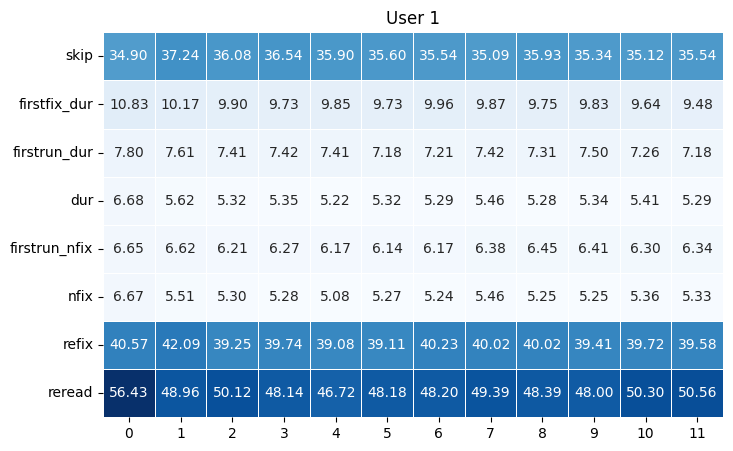

<Figure size 640x480 with 0 Axes>

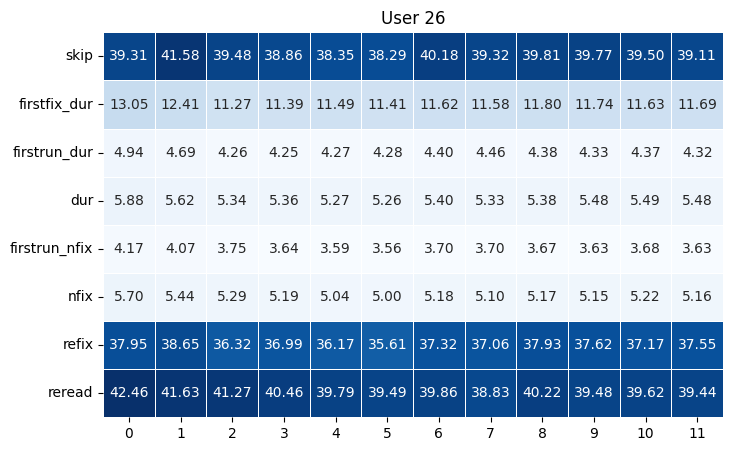

<Figure size 640x480 with 0 Axes>

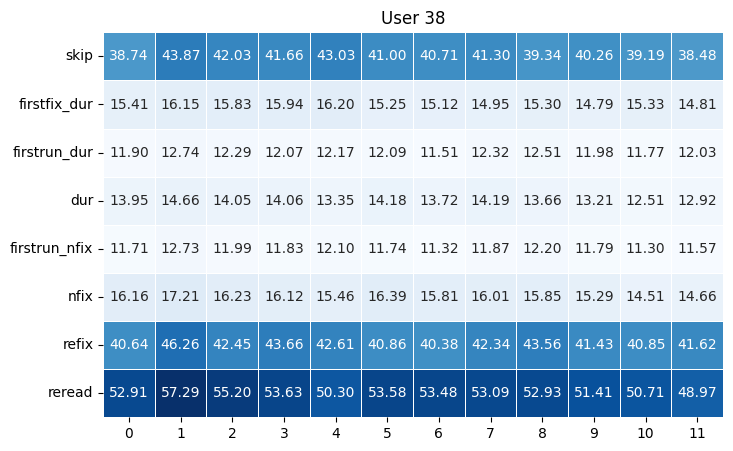

<Figure size 640x480 with 0 Axes>

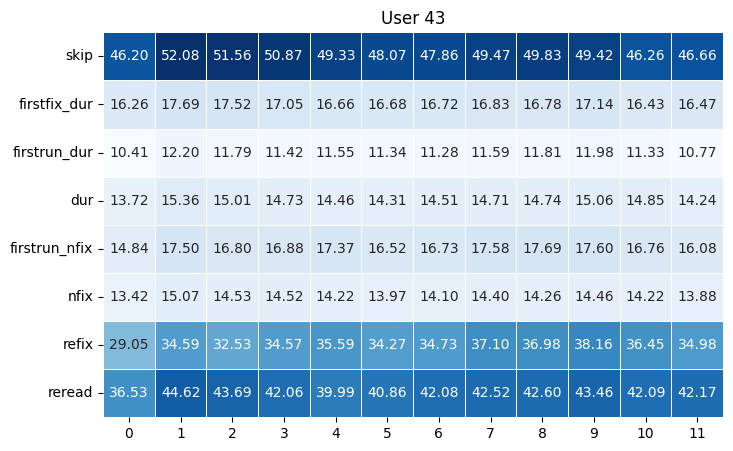

<Figure size 640x480 with 0 Axes>

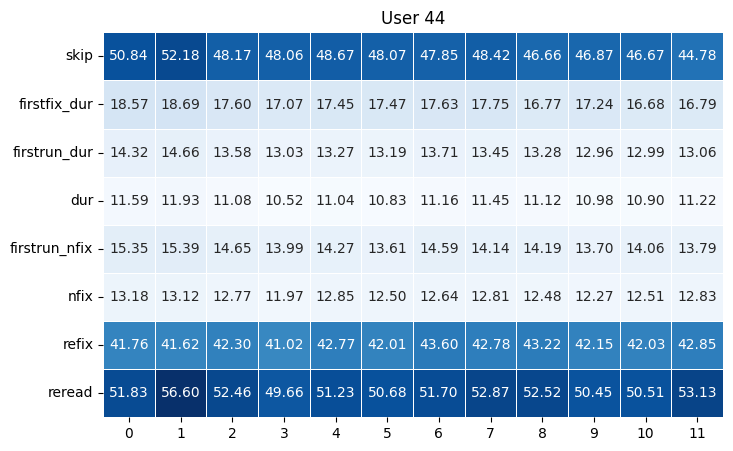

<Figure size 640x480 with 0 Axes>

In [37]:
for group in list(grouped_dfs):#[:1]:
    labels = group[0]
    header = f'Language = {labels[0]}, language_mode = {labels[1]}, pretraining = {labels[2]}'
    df = group[1]
    print(header)
    for user in sorted(df['user'].unique()):
        user_df = df[df['user'] == user]
        plt.figure(figsize=(8, 5));
        sns.heatmap(user_df[layers_columns].sort_index(), xticklabels=list(range(12)), yticklabels=user_df['feature'], annot=True, fmt=".2f", cmap='Blues', cbar=False, linewidth=.5).set(title=f'User {user}');
        plt.show()
        plt.clf()